In [1]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import backend as K, metrics
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten, Lambda
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils, plot

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [10]:
context = data.init()
n = 2
multiTrack = True
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = True
<meta message track_name name='01 16th Snare\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 no

In [167]:
n = 10
min_f = 3
max_f = 15
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
# x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, 
    n_polyrythms=1,
    n_channels=midi.N_NOTES,
    multiTrack=multiTrack)

note 60 [5.09470572]
note 61 [11.14390193]
note 62 [5.83521923]
note 60 [3.49037709]
note 61 [13.90924261]
note 62 [3.53818632]
note 60 [9.36925274]
note 61 [6.59813163]
note 62 [7.20627896]
note 60 [3.66703091]
note 61 [9.35716137]
note 62 [4.3707444]
note 60 [7.5840613]
note 61 [11.76671161]
note 62 [9.1353927]
note 60 [14.9909246]
note 61 [6.78033226]
note 62 [9.73344842]
note 60 [11.70204134]
note 61 [13.65460704]
note 62 [12.22505551]
note 60 [13.75445039]
note 61 [10.86844229]
note 62 [3.15078017]
note 60 [3.49594431]
note 61 [5.8583507]
note 62 [10.51350938]
note 60 [4.66631877]
note 61 [10.16798548]
note 62 [4.59470917]
note_on channel=0 note=61 velocity=127 time=0.026041666666666668
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.06979166666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.009375
note_on channel=0 note=62 velocity=127 time=0.0093

note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.07708333333333334
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.052083333333335
 |>  150
note_on channel=0 note=61 velocity=127 time=0.065625
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.059375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04791666666666666
note_off channel=0 note=61 velocity=127 

note_on channel=0 note=62 velocity=127 time=0.04791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_on channel=0 note=62 velocity=127 time=0.035416666666666666
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.022916666666666665
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.0083333

note_on channel=0 note=61 velocity=127 time=0.078125
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.052083333333333336
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.078125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.041666666666666664
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.0145833

In [168]:
n = 3
total = 1000 * 10
x_test = x_train[n:]
x_train = np.concatenate([x_train[:n] for _ in range(int(total/n))])

In [169]:
x_train.shape

(9999, 150, 3)

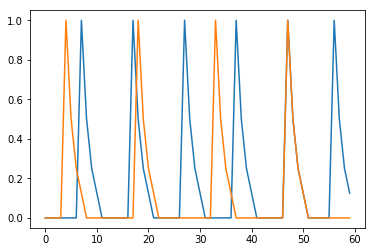

In [170]:
plt.plot(x_train[0,:60,0])
plt.plot(x_train[1,:60,0])

m (30, 3)


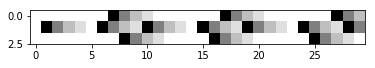

In [171]:
plot.multi(x_train[0, :30])

m (30, 3)


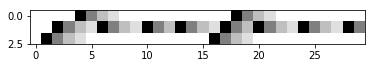

In [172]:
plot.multi(x_train[1, :30])

In [173]:
data = x_train[0,:20]
data.shape

(20, 3)

In [174]:
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = y_train.shape[1:] # shape of a single sample
timesteps, notes = x_train.shape[1:3]
# output_length = y_train.shape[1:][0]
input_shape

(150, 3)

In [175]:
output_shape

(150, 3)

In [176]:
num_encoder_tokens = x_train.shape[-1]
num_decoder_tokens = y_train.shape[-1]
# latent_dim = 1

In [177]:
input_shape
# input_shape = (150,)
input_shape

(150, 3)

In [178]:
batch_size = 32
original_dim = 150
latent_dim = 50
intermediate_dim = 150
epsilon_std = 1.0

In [179]:
# TODO Batch Normalization

In [180]:
def sampling(args, latent_dim, epsilon_std):
    z_mean, z_log_var = args
    # epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=epsilon_std)
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [252]:
k_reg = keras.regularizers.l2(1e-5)
# b_reg = keras.regularizers.l1(0.01)
a_reg = keras.regularizers.l1(1e-5)

def encoder(latent_dim, input_shape, intermediate_dim = 150):
    encoder_input = Input(shape=input_shape, name='encoder_input-')
    h = encoder_input
    # image_data_format = 'channels_last'   -   e.g. (28,28,3)
    # naive assumption:
    #   for drumkits no correlation between note_indices and occurrence at an timestep is assumed
    #   (that is, p(E|C) is not significantly different from p(D|C))
    #   - note that this _is_ the case for e.g. HH vs. OH
    #     these often occur in the same register (between different drumkits)
    #   - even with melodic/harmonic data, this assumption could help by reducing
    #    (1) unwanted repetition (stuttering) of notes
    #    (2) unwanted dissonance (caused by playing notes with an interval of a half step)
    
    timesteps = input_shape[-2]
    notes = input_shape[-1]
    
    # Convolve & Pool
#     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)

    h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='same')(h)
#     h = Conv1D(32, kernel_size=2, strides=1, activation='relu', padding='same')(h)
    h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
    
#     h = Conv1D(64, kernel_size=2, strides=2, activation='relu', padding='same')(h)
#     h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)
#     h = MaxPooling1D(pool_size=2, strides=2, padding='same')(h)
#     # 128 512

    # Dense layers
    h = Flatten()(h)
    h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)    
#     h = Dropout(0.1)(h) # uncomment when using larger batches
#     h = Dense(intermediate_dim, activation='relu')(h)
    # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)

    # Z Mean, Variance
    z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
    z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
    
    encoder_output = [z_mean, z_log_var]
    encoder_model = Model(encoder_input, encoder_output, name='encoder_model-')
    return encoder_model, z_mean, z_log_var, encoder_input

def z_(latent_dim, epsilon_std):
    # sample z from a distribution defined by [input_mean, input_log_var]
    # input :: [z_mean, z_log_var]
    z_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
    sampling_ = lambda args: sampling(args, latent_dim, epsilon_std)
    z_output = Lambda(sampling_, name='z_sampler-')(z_input)
    # z_output = Lambda(sampling_, output_shape=(latent_dim,), name='z_sampler-')(z_input)
    z_model = Model(z_input, z_output, name='z_model-')
    return z_model

def decoder(latent_dim, output_shape, filters = 32):
    z_input = Input(shape=(latent_dim,), name='decoder_input-')
    h = z_input
    # :output_shape = (timesteps, channels, channels) || (batches, filters, timesteps, channels)
    # keras offers just Conv2DTranspose and not Conv1DTranspose
    # - use 2D images during upsampling :: (timesteps, notes, channels) => (timesteps, notes, filters)
    # - use 1D images to optimize reconstruction :: (timesteps, filters) => (timesteps, notes)
    
    # at the start of upsampling, the image-structure does not yet have to correspond to the goal structure 
    # ?TODO use y*y*y starting dims, may conv, and only then correct the structure (?)
    
    timesteps = output_shape[-2] # cols
    notes = output_shape[-1] # rows
    channels = 1 # rgb

    # image_data_format = 'channels_last'
    # goal shape: (timesteps, notes, channels)
    # start with the 'reverse': lots of small imgs => few large img
    m = 4 # multiplier for dims
    output_shape = (channels, notes * m, timesteps)
    p = 'valid'

    # upsampling
    h = Dense(np.prod(output_shape[-3:]), activation='relu')(h)
    h = Reshape(output_shape[-3:])(h)
    
    # Convolve & Pool
    # Note that the kernel windows do not yet correspond to 'temporal' features, but rather to just spatial features
    k = (3,2) # (2,1) :: (timesteps, notes)
    s = (1,3)
    # TODO
    s1 = (3,1)
    s2 = (1,3)
    s3 = 2
    timesteps_ = int(timesteps / 2)
    h = Conv2DTranspose(timesteps_, kernel_size=k, strides=3, activation='relu', padding=p)(h)
    h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
#     h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
    h = Conv2DTranspose(16, kernel_size=k, strides=(3,1), activation='relu', padding=p)(h)
    h = MaxPooling2D(pool_size=2, strides=2, padding='same')(h)

#     h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
    h = Conv2DTranspose(16, kernel_size=k, strides=3, activation='relu', padding=p)(h)
    # 'end' of upsampling
    h = Conv2D(1, kernel_size=(1,2), strides=1, activation='relu', padding=p)(h)
    dims = keras.backend.int_shape(h)[1:]
    print('dims', dims)
    h = Reshape(dims[0:2])(h)
#     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding=p)(h)
    h = Conv1D(notes * m, kernel_size=2, strides=2, activation='relu', padding=p)(h)

    
    # Mean (output)
#     h = Conv2D(1, kernel_size=1, strides=s, activation='sigmoid', padding='same')(h)
    output_shape = (timesteps, notes)
    h = Flatten()(h)
    h = Dense(np.prod(output_shape), activation='sigmoid')(h)
    output_shape = (timesteps, notes)
    h = Reshape(output_shape)(h)
    decoder_output = h
    model = Model(inputs=z_input, outputs=decoder_output, name='decoder_model-')
    return model

In [270]:
encoder_model, z_mean, z_log_var, encoder_input = encoder(latent_dim, input_shape)
z_model = z_(latent_dim, epsilon_std)
decoder_model = decoder(latent_dim, output_shape)


encoder_model.summary()
z_model.summary()
decoder_model.summary()

dims (42, 164, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input- (InputLayer)     (None, 150, 3)       0                                            
__________________________________________________________________________________________________
conv1d_43 (Conv1D)              (None, 75, 32)       224         encoder_input-[0][0]             
__________________________________________________________________________________________________
conv1d_44 (Conv1D)              (None, 75, 64)       4160        conv1d_43[0][0]                  
__________________________________________________________________________________________________
flatten_31 (Flatten)            (None, 4800)         0           conv1d_44[0][0]                  
___________________________________________________________________________________________

In [280]:
vae_inputs = Input(shape=input_shape)
# vae_input = encoder_input # WHY ?
vae_outputs = decoder_model(z_model(encoder_model(vae_inputs)))
# vae_output = decoder_model(z)
vae = Model(vae_inputs, vae_outputs)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_51 (InputLayer)           (None, 150, 3)       0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 50), (None,  739634      input_51[0][0]                   
__________________________________________________________________________________________________
z_model- (Model)                (None, 50)           0           encoder_model-[5][0]             
                                                                 encoder_model-[5][1]             
__________________________________________________________________________________________________
decoder_model- (Model)          (None, 150, 3)       296278      z_model-[5][0]                   
Total para

In [281]:
def vae_loss(y_true, y_pred, z_mean, z_log_var, timesteps=150, notes=3, beta=1.):
#     xent_loss = 10 * K.binary_crossentropy(K.flatten(y_true), K.flatten(y_pred))
#     xent_loss = timesteps * notes * K.binary_crossentropy(K.flatten(y_true), K.flatten(y_pred))
    xent_loss = timesteps * notes * K.binary_crossentropy(y_true, y_pred)
#     kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    kl_loss = K.mean(K.square(z_mean) )# - K.exp(z_log_var)
    # kl_loss = - 0.5 * K.sum(1 + K.flatten(z_log_var) - K.square(K.flatten(z_mean)) - K.exp(K.flatten(z_log_var)), axis=-1)
    return xent_loss #+ beta * kl_loss

In [282]:
beta = 1.
metrics = ['acc','mse','mae','binary_crossentropy']
# loss = lambda y_true, y_pred: vae_loss(y_true, y_pred, z_mean, z_log_var, timesteps, notes)
loss = lambda y_true, y_pred: vae_loss(vae_inputs, vae_outputs, z_mean, z_log_var, timesteps, notes)

optimizer = 'rmsprop' # adam adadelta rmsprop nadam
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# vae.add_loss(loss)
# vae.compile(optimizer='rmsprop')

In [283]:
# vae.add_loss(vae_loss)
# vae.compile(optimizer='rmsprop', metrics=['binary_accuracy','mae'])

In [284]:
# z_train = x_train
# x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))
# x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(9999, 150, 3)

In [286]:
epochs = 250
m = 100
vs = 1/6
shuffle = True
callbacks = []
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]
# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
history = vae.fit(x_train[:m], x_train[:m], epochs=epochs, batch_size=batch_size,
          validation_split=vs, callbacks=callbacks, shuffle=shuffle)
# history = vae.fit(x_train[:m], shuffle=False, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

Train on 83 samples, validate on 17 samples
Epoch 1/250
83/83 [==============================] - 0s 6ms/step - loss: 215.8339 - acc: 0.5912 - mean_squared_error: 0.0807 - mean_absolute_error: 0.2187 - binary_crossentropy: 0.4796 - val_loss: 217.9216 - val_acc: 0.5808 - val_mean_squared_error: 0.0820 - val_mean_absolute_error: 0.2125 - val_binary_crossentropy: 0.4843
Epoch 2/250
83/83 [==============================] - 0s 6ms/step - loss: 217.0897 - acc: 0.5898 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2184 - binary_crossentropy: 0.4824 - val_loss: 217.5300 - val_acc: 0.5839 - val_mean_squared_error: 0.0817 - val_mean_absolute_error: 0.2267 - val_binary_crossentropy: 0.4834
Epoch 3/250
83/83 [==============================] - 0s 6ms/step - loss: 215.2127 - acc: 0.5898 - mean_squared_error: 0.0804 - mean_absolute_error: 0.2189 - binary_crossentropy: 0.4783 - val_loss: 220.0214 - val_acc: 0.5910 - val_mean_squared_error: 0.0822 - val_mean_absolute_error: 0.2082 - val_binary_cr

83/83 [==============================] - 1s 7ms/step - loss: 119.3365 - acc: 0.8745 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0480 - binary_crossentropy: 0.2652 - val_loss: 110.9741 - val_acc: 0.8894 - val_mean_squared_error: 0.0025 - val_mean_absolute_error: 0.0260 - val_binary_crossentropy: 0.2466
Epoch 27/250
83/83 [==============================] - 0s 6ms/step - loss: 110.3393 - acc: 0.9022 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0248 - binary_crossentropy: 0.2452 - val_loss: 109.3852 - val_acc: 0.9047 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0198 - val_binary_crossentropy: 0.2431
Epoch 28/250
83/83 [==============================] - 0s 6ms/step - loss: 108.6138 - acc: 0.9094 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0191 - binary_crossentropy: 0.2414 - val_loss: 111.1414 - val_acc: 0.9110 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0227 - val_binary_crossentropy: 0.2470
Epoch 29/250
83/83 [===============

83/83 [==============================] - 0s 6ms/step - loss: 106.4729 - acc: 0.8983 - mean_squared_error: 8.4974e-04 - mean_absolute_error: 0.0151 - binary_crossentropy: 0.2366 - val_loss: 107.0139 - val_acc: 0.8835 - val_mean_squared_error: 9.2221e-04 - val_mean_absolute_error: 0.0143 - val_binary_crossentropy: 0.2378
Epoch 52/250
83/83 [==============================] - 0s 6ms/step - loss: 107.3207 - acc: 0.8951 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0192 - binary_crossentropy: 0.2385 - val_loss: 106.9549 - val_acc: 0.8984 - val_mean_squared_error: 7.6764e-04 - val_mean_absolute_error: 0.0154 - val_binary_crossentropy: 0.2377
Epoch 53/250
83/83 [==============================] - 0s 6ms/step - loss: 108.1200 - acc: 0.9035 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0223 - binary_crossentropy: 0.2403 - val_loss: 106.9979 - val_acc: 0.8941 - val_mean_squared_error: 8.8463e-04 - val_mean_absolute_error: 0.0165 - val_binary_crossentropy: 0.2378
Epoch 54/250
83/83 

Epoch 76/250
83/83 [==============================] - 0s 6ms/step - loss: 106.2746 - acc: 0.8986 - mean_squared_error: 7.0938e-04 - mean_absolute_error: 0.0146 - binary_crossentropy: 0.2362 - val_loss: 107.1106 - val_acc: 0.8890 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0187 - val_binary_crossentropy: 0.2380
Epoch 77/250
83/83 [==============================] - 0s 6ms/step - loss: 106.3696 - acc: 0.8949 - mean_squared_error: 9.3136e-04 - mean_absolute_error: 0.0173 - binary_crossentropy: 0.2364 - val_loss: 106.7827 - val_acc: 0.8949 - val_mean_squared_error: 6.4505e-04 - val_mean_absolute_error: 0.0126 - val_binary_crossentropy: 0.2373
Epoch 78/250
83/83 [==============================] - 1s 8ms/step - loss: 105.8606 - acc: 0.8983 - mean_squared_error: 4.4058e-04 - mean_absolute_error: 0.0104 - binary_crossentropy: 0.2352 - val_loss: 105.9911 - val_acc: 0.8996 - val_mean_squared_error: 1.1185e-04 - val_mean_absolute_error: 0.0055 - val_binary_crossentropy: 0.2355
Ep

Epoch 101/250
83/83 [==============================] - 1s 6ms/step - loss: 105.6245 - acc: 0.8949 - mean_squared_error: 3.1350e-04 - mean_absolute_error: 0.0099 - binary_crossentropy: 0.2347 - val_loss: 106.1801 - val_acc: 0.8965 - val_mean_squared_error: 2.3915e-04 - val_mean_absolute_error: 0.0089 - val_binary_crossentropy: 0.2360
Epoch 102/250
83/83 [==============================] - 0s 6ms/step - loss: 105.6658 - acc: 0.8969 - mean_squared_error: 3.2774e-04 - mean_absolute_error: 0.0103 - binary_crossentropy: 0.2348 - val_loss: 106.3534 - val_acc: 0.8914 - val_mean_squared_error: 4.1361e-04 - val_mean_absolute_error: 0.0112 - val_binary_crossentropy: 0.2363
Epoch 103/250
83/83 [==============================] - 1s 7ms/step - loss: 105.6006 - acc: 0.8948 - mean_squared_error: 3.0754e-04 - mean_absolute_error: 0.0096 - binary_crossentropy: 0.2347 - val_loss: 106.1028 - val_acc: 0.8812 - val_mean_squared_error: 2.1438e-04 - val_mean_absolute_error: 0.0086 - val_binary_crossentropy: 0.

83/83 [==============================] - 0s 5ms/step - loss: 105.4051 - acc: 0.8974 - mean_squared_error: 1.5903e-04 - mean_absolute_error: 0.0072 - binary_crossentropy: 0.2342 - val_loss: 106.3219 - val_acc: 0.8996 - val_mean_squared_error: 3.8112e-04 - val_mean_absolute_error: 0.0121 - val_binary_crossentropy: 0.2363
Epoch 150/250
83/83 [==============================] - 0s 5ms/step - loss: 105.6699 - acc: 0.8952 - mean_squared_error: 3.4427e-04 - mean_absolute_error: 0.0112 - binary_crossentropy: 0.2348 - val_loss: 106.1315 - val_acc: 0.8894 - val_mean_squared_error: 2.2391e-04 - val_mean_absolute_error: 0.0078 - val_binary_crossentropy: 0.2358
Epoch 151/250
83/83 [==============================] - 0s 5ms/step - loss: 105.5259 - acc: 0.9012 - mean_squared_error: 2.3783e-04 - mean_absolute_error: 0.0086 - binary_crossentropy: 0.2345 - val_loss: 106.0862 - val_acc: 0.8882 - val_mean_squared_error: 2.3680e-04 - val_mean_absolute_error: 0.0087 - val_binary_crossentropy: 0.2357
Epoch 152

83/83 [==============================] - 0s 5ms/step - loss: 105.4492 - acc: 0.8982 - mean_squared_error: 1.8853e-04 - mean_absolute_error: 0.0078 - binary_crossentropy: 0.2343 - val_loss: 105.9547 - val_acc: 0.8910 - val_mean_squared_error: 1.0693e-04 - val_mean_absolute_error: 0.0061 - val_binary_crossentropy: 0.2355
Epoch 198/250
83/83 [==============================] - 0s 6ms/step - loss: 105.3190 - acc: 0.8952 - mean_squared_error: 9.3688e-05 - mean_absolute_error: 0.0057 - binary_crossentropy: 0.2340 - val_loss: 105.9469 - val_acc: 0.9012 - val_mean_squared_error: 1.0156e-04 - val_mean_absolute_error: 0.0059 - val_binary_crossentropy: 0.2354
Epoch 199/250
83/83 [==============================] - 0s 6ms/step - loss: 105.3291 - acc: 0.8969 - mean_squared_error: 1.0236e-04 - mean_absolute_error: 0.0059 - binary_crossentropy: 0.2341 - val_loss: 105.9643 - val_acc: 0.9016 - val_mean_squared_error: 1.0141e-04 - val_mean_absolute_error: 0.0056 - val_binary_crossentropy: 0.2355
Epoch 200

83/83 [==============================] - 0s 6ms/step - loss: 105.3040 - acc: 0.8983 - mean_squared_error: 8.4170e-05 - mean_absolute_error: 0.0052 - binary_crossentropy: 0.2340 - val_loss: 105.9398 - val_acc: 0.8800 - val_mean_squared_error: 9.7883e-05 - val_mean_absolute_error: 0.0051 - val_binary_crossentropy: 0.2354
Epoch 246/250
83/83 [==============================] - 0s 6ms/step - loss: 105.2648 - acc: 0.8961 - mean_squared_error: 5.8930e-05 - mean_absolute_error: 0.0041 - binary_crossentropy: 0.2339 - val_loss: 105.9275 - val_acc: 0.8933 - val_mean_squared_error: 9.7530e-05 - val_mean_absolute_error: 0.0057 - val_binary_crossentropy: 0.2354
Epoch 247/250
83/83 [==============================] - 0s 6ms/step - loss: 105.3308 - acc: 0.8978 - mean_squared_error: 1.0904e-04 - mean_absolute_error: 0.0061 - binary_crossentropy: 0.2341 - val_loss: 105.9578 - val_acc: 0.9020 - val_mean_squared_error: 1.0412e-04 - val_mean_absolute_error: 0.0062 - val_binary_crossentropy: 0.2355
Epoch 248

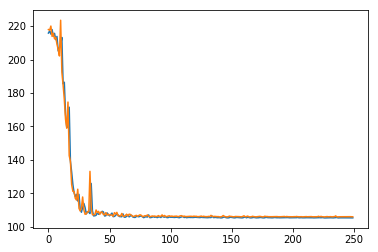

In [287]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

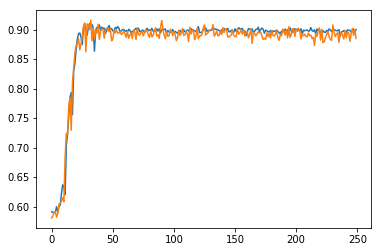

In [288]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

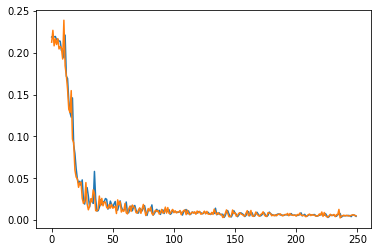

In [289]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
# plot_model(vae, to_file='model.png')

In [307]:
encoder_results = encoder_model.predict(x_train[-3:])

In [308]:
z_results = z_model.predict(encoder_results)
z_results.shape

(3, 50)

In [309]:
results = decoder_model.predict(z_results)
results.shape

(3, 150, 3)

m (30, 3)


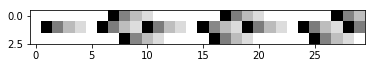

In [310]:
plot.multi(results[0, :30])

m (30, 3)


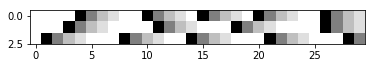

In [311]:
plot.multi(x_train[-1, :30])

In [328]:
inter = z_results[:2].mean(axis=0)
inter.shape

(50,)

m (30, 3)


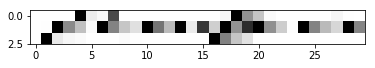

In [329]:
results_ = decoder_model.predict(np.stack([inter]))
plot.multi(results_[0, :30])

In [ ]:
plt.plot(x_train[0,:100,:])

In [ ]:
result.shape

In [ ]:
n1 = 30
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i][:n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [ ]:
mid = midi.decode_track(context, result)
dn = config.dataset_dir
# io.export_midifile(mid, dn + 'song_seq-seq.mid')

In [ ]:
results = []
latent_samples = []
for seq in x_test[-2:]:
    encoded = encode_sequence(np.stack([seq]))
    latent_samples.append(encoded)
    result = decode_sequence(encoded, encoder_model, decoder_model)
    results.append(result)
results[0].shape

In [ ]:
len(encoded)

In [ ]:
encoded[0].shape

In [ ]:
plt.plot(encoded[0][0,:10])
plt.plot(encoded[1][0,:10])

In [ ]:
e = np.array(latent_samples)
e.shape

In [ ]:
# reduce dimensionality
# e = e.reshape(e.shape[0],2,e.shape[-1])
e.shape

In [ ]:
e1.mean(axis=0).shape

In [ ]:
# new = e.transpose().mean(axis=1).transpose()
e1 = e[:,0] # state h
e2 = e[:,1] # state c
new = [e1.mean(axis=0), e2.mean(axis=0)]
# new = [[e[:,i].mean(axis=0)] for i in [0,1]]
plt.plot(new[0][0][:10])
len(new)

In [ ]:
e1.mean(axis=0).shape

In [ ]:
l[0].shape

In [ ]:
l = latent_samples[0]
len(l) # latent_sample :: (x,1,64)

In [ ]:
# new_ = decode_sequence(latent_samples[0], encoder_model, decoder_model)
new_ = decode_sequence(new, encoder_model, decoder_model)

In [ ]:
new_.shape

In [ ]:
plt.plot(new_[:100])

In [ ]:
plt.plot(results[0][:100])

In [ ]:
# results[0]

In [ ]:
mid_new = midi.decode_track(context, results[0])
io.export_midifile(mid_new, config.export_dir + 'real_mid_new_lstm.mid')

In [ ]:
x_test.shape

In [ ]:
# x_test, y_test = gen_xy_sin_to_f(3, f=2)

In [ ]:
results = model.predict([x_test,x_test])
results.shape

In [ ]:
# the 'true' results
i = 0
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],y_test[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
# predicted results
i = 0
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 2
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 0
selection = 1
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)